# GRU 레이어 사용하기 

#### 데이터 생성

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

* np.random.rand(100) : 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
* np.random.choice(100, 2, replace=False) : 100중 2개를 추출하는데 중복없이 추출
* np.zeros(100) : 100개의 0을 가진 배열 생성
* zeros[idx] = 1 : 리스트중에 마킹 인덱스(idx)가 저장된 부분만 1로 설정해 원-핫 인코딩 벡터를 만듭니다.
* list(zip(zeros, lst)) : list(zip([1, 2, 3], [4, 5, 6])) --> [(1, 4), (2, 5), (3, 6)]
* np.prod(lst[idx]) : 리스트의 각 항목 곱하기 수행 b = array([1, 2, 3, 4]) --> np.prod(b) # 123*4 --> 24m

In [2]:
X = []   # 입력 데이터 리스트 
Y = []   # 결과 리스트 

for i in range(3000):
    lst = np.random.rand(100)    
    idx = np.random.choice(100, 2, replace=False)  
    zeros = np.zeros(100)  
    zeros[idx] = 1  
    
    X.append(np.array(list(zip(zeros, lst))))  
    Y.append(np.prod(lst[idx]))   

print(len(X[0]))
print(X[0])
print(Y[0])

100
[[0.         0.41756098]
 [0.         0.09956395]
 [0.         0.32879244]
 [0.         0.64176105]
 [0.         0.26842916]
 [0.         0.13842666]
 [0.         0.8944894 ]
 [0.         0.62032686]
 [0.         0.38305916]
 [0.         0.68130043]
 [0.         0.34426264]
 [0.         0.43402292]
 [0.         0.52795718]
 [0.         0.51890523]
 [0.         0.06847761]
 [0.         0.64590954]
 [0.         0.19327971]
 [0.         0.7546314 ]
 [0.         0.74800374]
 [0.         0.20723881]
 [0.         0.1875694 ]
 [0.         0.21445341]
 [0.         0.88867603]
 [0.         0.11633233]
 [0.         0.69789233]
 [0.         0.77930922]
 [0.         0.1322977 ]
 [1.         0.79006155]
 [0.         0.09808603]
 [0.         0.57595428]
 [0.         0.56373601]
 [0.         0.95534903]
 [0.         0.28024304]
 [0.         0.8767781 ]
 [0.         0.37387341]
 [0.         0.3774568 ]
 [0.         0.86854563]
 [0.         0.9698596 ]
 [0.         0.02918907]
 [0.         0.123382

#### GRU 레이어를 사용한 곱셈 문제 모델 정의

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


#### GRU 네트워크 학습

In [4]:
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0505 - val_loss: 0.0486
Epoch 2/100
2048/2048 [==============================] - 0s 220us/sample - loss: 0.0484 - val_loss: 0.0475
Epoch 3/100
2048/2048 [==============================] - 0s 223us/sample - loss: 0.0480 - val_loss: 0.0473
Epoch 4/100
2048/2048 [==============================] - 0s 228us/sample - loss: 0.0484 - val_loss: 0.0481
Epoch 5/100
2048/2048 [==============================] - 0s 223us/sample - loss: 0.0485 - val_loss: 0.0481
Epoch 6/100
2048/2048 [==============================] - 0s 225us/sample - loss: 0.0482 - val_loss: 0.0475
Epoch 7/100
2048/2048 [==============================] - 0s 224us/sample - loss: 0.0480 - val_loss: 0.0471
Epoch 8/100
2048/2048 [==============================] - 0s 222us/sample - loss: 0.0479 - val_loss: 0.0472
Epoch 9/100
2048/2048 [==============================] - 0s 224us/sample - loss: 0.0487 - val_loss:

2048/2048 [==============================] - 0s 221us/sample - loss: 2.1471e-04 - val_loss: 1.9245e-04
Epoch 74/100
2048/2048 [==============================] - 0s 224us/sample - loss: 2.3475e-04 - val_loss: 4.5893e-04
Epoch 75/100
2048/2048 [==============================] - 0s 223us/sample - loss: 2.9003e-04 - val_loss: 2.6799e-04
Epoch 76/100
2048/2048 [==============================] - 0s 225us/sample - loss: 2.2809e-04 - val_loss: 1.7746e-04
Epoch 77/100
2048/2048 [==============================] - 0s 222us/sample - loss: 1.8275e-04 - val_loss: 1.5493e-04
Epoch 78/100
2048/2048 [==============================] - 0s 224us/sample - loss: 1.7064e-04 - val_loss: 1.5257e-04
Epoch 79/100
2048/2048 [==============================] - 0s 225us/sample - loss: 1.9514e-04 - val_loss: 2.0901e-04
Epoch 80/100
2048/2048 [==============================] - 0s 224us/sample - loss: 2.1328e-04 - val_loss: 1.9041e-04
Epoch 81/100
2048/2048 [==============================] - 0s 225us/sample - loss: 1.5

#### 그래프로 비교하기 

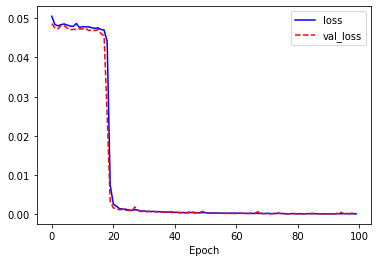

In [5]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### 모델 평가하기

In [6]:
model.evaluate(X[2560:], Y[2560:])

440/440 [==============================] - 0s 841us/sample - loss: 1.6736e-04


0.0001673627314051952

#### 예측하고 정확도 측정하기

In [7]:
prediction = model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]),"\t", (lambda i : "오답" if abs(prediction[i][0] - Y[2560+i]) > 0.04 else "정답")(i)  )
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

0.17555552034565405 	 0.16293754 	diff: 0.012617983509983582 	 정답
0.19768719414968244 	 0.18540321 	diff: 0.012283981244752329 	 정답
0.15216611782430678 	 0.14741081 	diff: 0.004755307830562883 	 정답
0.24321189653244973 	 0.23448738 	diff: 0.008724511974725735 	 정답
0.33314158628776325 	 0.3301228 	diff: 0.003018787606504092 	 정답
correctness: 97.95454545454545 %


* 정확도 97.9 %란 상당히 높은 성능을 보인다.